# Lab 3 - Perceptron & Gradient Descent

In this lab, we will discuss the Perceptron model, which can be trained using the Gradient Descent algorithm.

Specifically, we will cover the following topics:

1. Gradient Descent to minimize convex functions
2. Perceptron & Decision boundary
3. Perceptron - Gradient Descent
4. Mini batch Stochastic Gradient Descent
5. Limitations
6. Sklearn

### Materials for the Lab:
1. Course slides

# 1. Gradient Descent on Simple Convex Functions

**Gradient Descent (GD)** is a iterative method to find a **local minimum** of **differentiable functions**.
The minimum is *global* when the function is *convex*.

**Gradient descent** is the basis of many Machine Learning algorithms i.e optimising Neural Netwroks.

In Particular, Gradient descent is a way to minimize an objective function whit respect to model’s parameters by updating the parameters in the opposite direction of the gradient of the objective function w.r.t. to the parameters.

<figure>
  <img style="float: left;" src="./figures/Gradiend_descent.png" width="1000"/>
</figure>

Now we will see an example for a $f(x) = (x-5)^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    """
    A convex function
    f(x) = (x-5)^2
    """
    y = (x-5)**2
    return y

In [2]:
x = np.linspace(-5, 15,100)

plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.legend()
plt.title("Convex function \n  f(x) = (x-5)^2")
plt.scatter([5], [0], color = "g", label = "min")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()
plt.close()

NameError: name 'f' is not defined

<Figure size 640x480 with 0 Axes>

### Implement Gradient Descent
in the following example we will find the minimum of a function using gradient decent.


<figure>
  <img style="float: left;" src="./figures/sgd.png" width="400"/>
</figure>|

In [4]:
x_init= -13.0
thr = 0.0001
step_max = 500
lr = 0.5

function = f

def gradient_decent(x_init, lr, step_max, thr):
    x = x_init
    
    x_history = [x]
    step = 0 
    while step < step_max:
        # step 1. find gradient
        gradient = 2 * (x-5)
        
        # step 2. update x to the oposide direction of the gradient
        x = x - lr * gradient

        # just keep the values of x
        x_history += [x]
        step = step +1
        
        # step 3. check stoping critiria
        if abs(x - x_history[-2]) < thr:
            break
    return x, step, np.array(x_history) 

In [5]:
x_min, total_steps, x_history = gradient_decent(x_init = -1.0 ,
                                                lr = 0.1,
                                                step_max = 100,
                                                thr = 0.0001)

In [6]:
print("Total steps to achive minimum:" , total_steps)
print("Minimum:" , x_min)

Total steps to achive minimum: 44
Minimum: 4.999673328927756


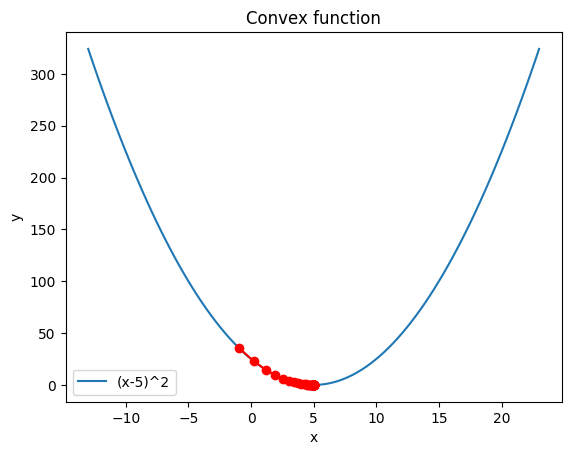

In [7]:
x = np.linspace(-13, 23,100)
# x_history = np.array()
plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.plot(x_history, f(x_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

### Effect of Learning Rate

The algorithm has several hyperapameres that we have to tune, as for example the learning rate.

### 1. small learning rate
In general having small learning rate can slow the coverage of the algorithm.

In [8]:
x_min, total_steps, x_history = gradient_decent(x_init = -1.0 ,
                                                lr = 0.001,
                                                step_max = 600,
                                                thr = 0.000001)

In [9]:
print("Total steps to achive minimum:" , total_steps)
print("Minimum:" , x_min)

Total steps to achive minimum: 600
Minimum: 3.195004918547244


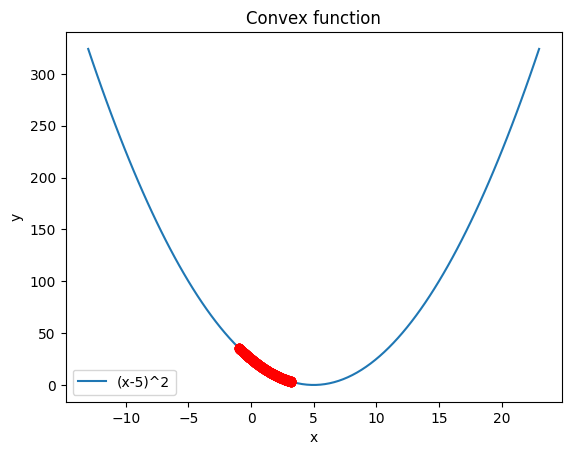

In [10]:
x = np.linspace(-13, 23,100)
# x_history = np.array()
plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.plot(x_history, f(x_history), marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

### 2. big learning rate
On the othe hand a big learning rate can overshot and the algorithm not aproch the minimum value.

In [11]:
x_min, total_steps, x_history = gradient_decent(x_init = -3.0 ,
                                                lr = 1.1,
                                                step_max = 5,
                                                thr = 0.001)

In [12]:
print("Total steps to achive minimum:" , total_steps)
print("Minimum:" , x_min)

Total steps to achive minimum: 5
Minimum: 24.906560000000017


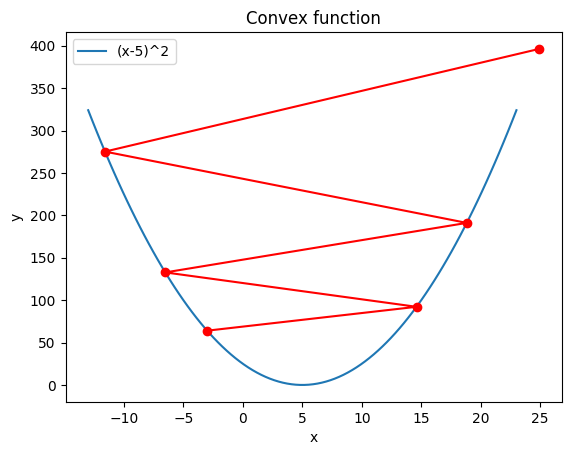

In [13]:
x = np.linspace(-13, 23,100)
# x_history = np.array()
plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.plot(x_history, f(x_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

# Perceptron Model

The **Perceptron** is one of the simplest types of artificial neural networks, primarily used for binary classification tasks. It is a linear classifier that makes predictions based on a linear combination of input features.

- **Input Layer**: Receives the feature vector $\mathbf{x} = (x_1, x_2, \ldots, x_n)$
- **Labels**: with labels $y \in \{-1, 1\}$

The output of the Perceptron is calculated as:

$$
\hat{y} = \text{sign}(\mathbf{w}^T \mathbf{x} + b)
$$

- **Weights**: Each input $x_i$ is associated with a weight $w_i$.
- **Bias**: A constant value added to the weighted sum of inputs.


### Generate some data

We start by generating some linear separate data.

In [14]:
np.random.seed(123)

In [15]:
mean = [0, 0]
covariance = [[1,0],
              [0,1]]
n_samples = 50

x = np.random.multivariate_normal(mean, covariance, n_samples)
y = np.random.choice(2, size=n_samples)
y[y==0]=-1
x[y ==-1 ]+=5

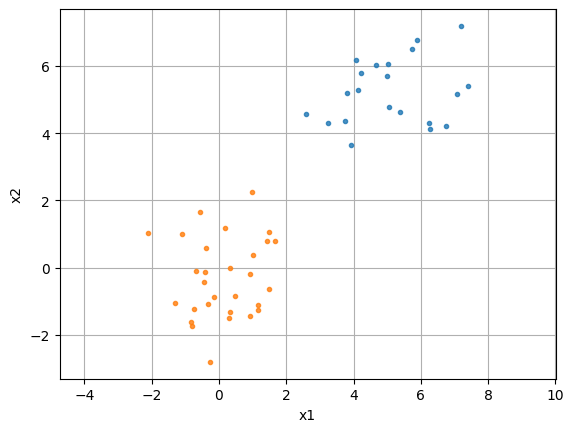

In [16]:
plt.figure()
plt.plot(x[y==-1,0], x[y==-1,1], '.', alpha=0.8)
plt.plot(x[y==1,0], x[y==1,1], '.', alpha=0.8)
plt.axis('equal')
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

## Perceptron Decision Boundary

The perceptron is a linear model, which means it has a linear decision boundary that separates the classes.

<img src="./figures/bd.png" alt="Decision Boundary" width="800" height="600">

## Decision Boundary for 2D Data

The decision boundary is defined by the equation:

$$
\mathbf{w}^T \mathbf{x} + b = 0
$$

This equation represents a hyperplane in the feature space as we see before.


For 2D data, the decision boundary is simply a line that we can visualize by rearranging the equation to solve for one of the variables, typically \( x_2 \):

$$
x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}
$$

where $w_1$ and $w_2$ are the components of the weight vector $\mathbf{w}$.  
The slope of the line is determined by the ratio $-\frac{w_1}{w_2}$, and the intercept is given by $-\frac{b}{w_2}$.

We can now plot the decision boundary of our model along with the data points to see how well it separates the classes.


In [17]:
w = np.array([2, 2])
b = np.array([-3])

In [18]:
x1_values = np.linspace(-5, 15, 100)

def get_decision_boundary(w, b, x1):
    x2_values = - (w[0] / w[1]) * x1 - (b / w[1])
    return x2_values

x2_values = get_decision_boundary(w=w, b=b, x1=x1_values)

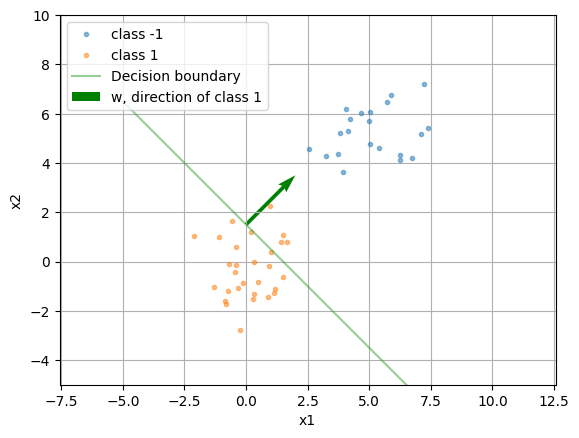

In [19]:
plt.figure()
plt.plot(x[y==-1 ,0], x[y==-1,1], '.', alpha=0.5, label = "class -1")
plt.plot(x[y==1, 0],  x[y==1,1], '.', alpha=0.5, label = "class 1")
plt.plot(x1_values, x2_values, alpha=0.5, label = "Decision boundary")
# Plot the weight vector, w, that is perpendicular to the decision boundary
x1_w = 0
x2_w = get_decision_boundary(w=w, b=b, x1=0)
plt.quiver(x1_w, x2_w, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='g', label="w, direction of class 1")
plt.axis('equal')
plt.ylim(-5,10)
plt.xlim(-5,10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()

In [20]:
data_x = x
data_y = y

## Prediction

The output of the Perceptron is calculated as:

$$
\hat{y} = \text{sign}(\mathbf{w}^T \mathbf{x} + b) =  \text{sign}\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

In [21]:
class perceptron(object):
    def __init__(self,n_features,rs=42):
        np.random.seed(rs)
        self.w = np.array([2, 2])
        self.b = np.array([-3])
        
    def predict(self,x):
        y_hat = np.sign(np.sum(w * x,axis=1) + self.b)
        return y_hat

In [22]:
model = perceptron(n_features=2)
x_test = np.array([[5, 0],
                   [0, -5]])
model.predict(x_test)

array([ 1, -1])

## Learning Algorithm
The Perceptron learns by adjusting weights based on errors in predictions. 

In case wher $ y\neq \hat{y} $ we update the weights:

$$
\mathbf{w} \leftarrow \mathbf{w} + \eta y_i  \mathbf{x}_i
$$

where:
- $\eta$ is the learning rate,
- $y_i$ is the true label,
- $\hat{y}_i$ is the predicted label.

So, for each data point we:

1. Make the prediction $\hat{y}$.
2. If the prediction is wrong, we update the weights according to the formula.

Additionally, we can pass through the dataset several times, where one pass of the dataset is called an epoch.

In [23]:
import sklearn
class perceptron(object):
    def __init__(self,n_features,rs):
        self.rs =rs
        np.random.seed(rs)
        self.w = np.random.uniform(size=n_features)
        self.b = np.random.uniform(size=1)
        self.w_history = [self.w]
        self.b_history = [self.b]
        self.x_history = []
        self.y_hat_history = []
        self.y_history = []
        
    def predict(self,x):
        y_hat = np.sign(np.sum(self.w * x,axis=1) + self.b)
        return y_hat
    
    def save_history(self, x, y_hat, y):
        self.w_history.append(self.w)
        self.b_history.append(self.b)
        self.x_history.append(x)
        self.y_hat_history.append(y_hat)
        self.y_history.append(y)
        
    def fit(self, data_x, data_y, lr,epochs):
        # for several epochs
        for epoch in range(epochs):
            
            # after each epoch
            data = sklearn.utils.shuffle(data_x, data_y, random_state=self.rs)
            random_x, random_y = data
            for x, y in zip(random_x, random_y):
                y_hat = self.predict([x])
                
                if y_hat == y:
                    continue # we dont have to update the weights
                else:
                    # now we update the weights
                    self.w = self.w + lr * y * x
                    self.b = self.b + lr * y * 1
                self.save_history(x,y_hat,y)

In [24]:
model = perceptron(n_features=2,rs=1234)

In [25]:
model.fit(data_x= x,data_y = y.reshape(-1,1), lr = 0.05, epochs=10)

In [26]:
model.w_history

[array([0.19151945, 0.62210877]),
 array([0.24902973, 0.55874117]),
 array([-0.10532594,  0.30051911]),
 array([-0.05997068,  0.22908507]),
 array([-0.42026718, -0.13025423]),
 array([-0.34548498, -0.0767846 ]),
 array([-0.27462003, -0.03642277])]

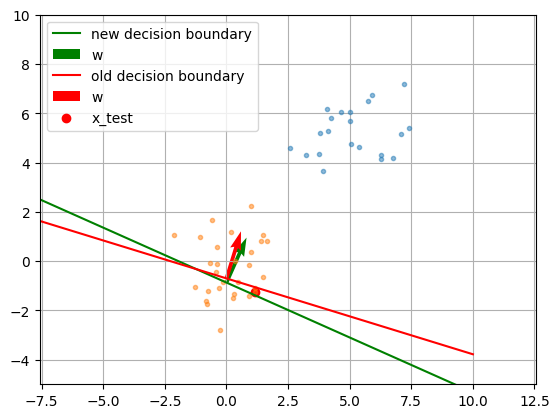

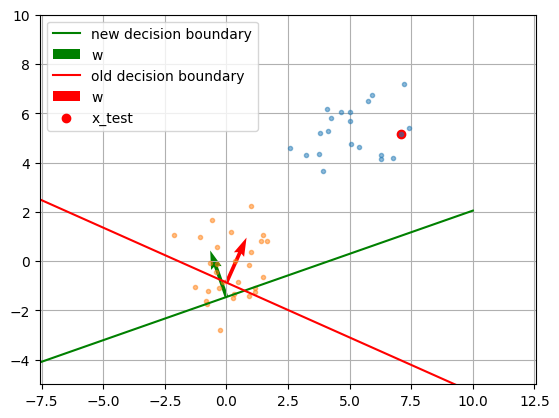

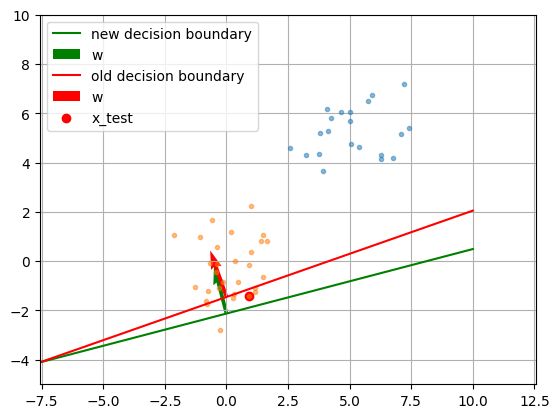

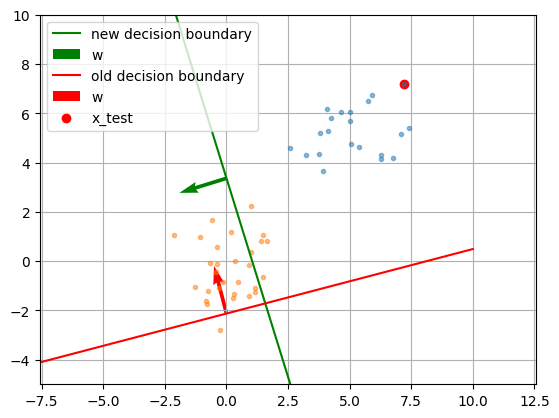

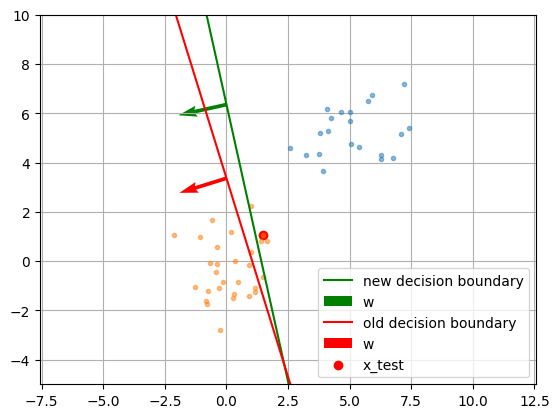

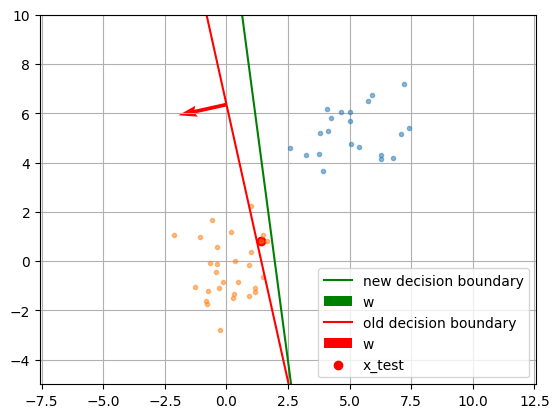

In [27]:
x1_values = np.linspace(-10, 10, 100)
for i in range(len(model.w_history)-1):
    plt.figure()
    plt.plot(x[y==-1,0], x[y==-1,1], '.', alpha=0.5)
    plt.plot(x[y==1,0], x[y==1,1], '.', alpha=0.5)
    # Calculate corresponding x2 values using the decision boundary equation

    w = model.w_history[i+1]
    b = model.b_history[i+1]
    norm = np.linalg.norm(w)
    x2_values = get_decision_boundary(w=w, b=b, x1=x1_values)
    plt.plot(x1_values, x2_values, label = f"new decision boundary", color= "g")
    x1_w = 0
    x2_w = get_decision_boundary(w=w, b=b, x1=0)
    w= w/norm
    plt.quiver(x1_w, x2_w, w[0], w[1], scale_units='xy',angles='xy', scale=1/2, color='g', label="w")
    plt.axis('equal')
    
    w = model.w_history[i]
    b = model.b_history[i]
    norm = np.linalg.norm(w)
    x2_values = get_decision_boundary(w=w, b=b, x1=x1_values)
    plt.plot(x1_values, x2_values, label = f"old decision boundary",color="r")
    x1_w = 0
    x2_w = get_decision_boundary(w=w, b=b, x1=0)
    w= w/norm
    plt.quiver(x1_w, x2_w, w[0], w[1], scale_units='xy',angles='xy', scale=1/2, color='r', label="w")
    plt.axis('equal')
    
    x_test = model.x_history[i]
    plt.scatter(x_test[0],x_test[1],color = "red", label = "x_test")
    plt.axis('equal')

    plt.ylim(-5,10)
    plt.xlim(-5,10)
    plt.legend()
    plt.grid()
    plt.show()

In general, in the case of linearly separable classes, the training will stop after a finite number of updates.

## **Mini-Batch SGD**

Instead of updating the model for every single data point or the entire dataset at once, we update it using smaller groups of data (mini-batches), averaging the gradients over the batch. 

This approach offers several advantages:


- **Smoother Updates**: Averaging gradients over a batch reduces noise, leading to more stable updates.

- **Computational Efficiency**: Using small batches optimizes memory use and enhances parallel processing on modern hardware (e.g., GPUs).

In [28]:
mean = [0, 0]
covariance = [[1,0],
              [0,1]]
n_samples = 50

x = np.random.multivariate_normal(mean, covariance, n_samples)
y = np.random.choice(2, size=n_samples)
y[y==0]=-1
x[y ==-1 ]+=5.

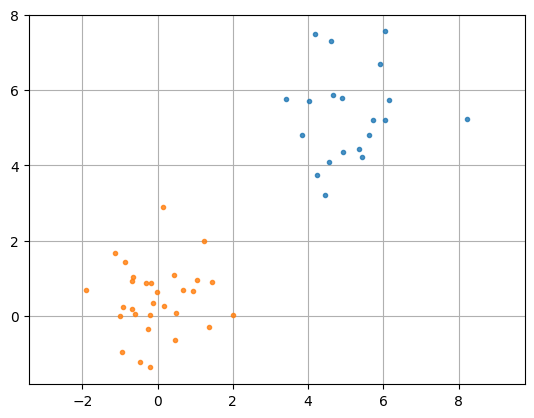

In [29]:
plt.figure()
plt.plot(x[y==-1,0], x[y==-1,1], '.', alpha=0.8)
plt.plot(x[y==1,0], x[y==1,1], '.', alpha=0.8)
plt.axis('equal')
plt.grid()
plt.show()

In [30]:
import sklearn
class perceptron(object):
    def __init__(self,n_features,rs):
        self.rs =rs
        np.random.seed(rs)
        self.w = np.random.uniform(size=n_features)
        self.b = np.random.uniform(size=1)
        self.w_history = [self.w]
        self.b_history = [self.b]
        self.x_history = []
        self.y_hat_history = []
        self.y_history = []
        
    def predict(self,x):
        y_hat = np.sign(np.sum(self.w * x,axis=1) + self.b)
        return y_hat
    
    def save_history(self, x, y_hat, y):
        self.w_history.append(self.w)
        self.b_history.append(self.b)
        self.x_history.append(x)
        self.y_hat_history.append(y_hat)
        self.y_history.append(y)
        
    def fit(self, data_x, data_y, lr, epochs):
        # for several epochs
        for epoch in range(epochs):
            data = sklearn.utils.shuffle(data_x, data_y, random_state=self.rs)
            random_x, random_y = data
            for x, y in zip(random_x, random_y):
                y_hat = self.predict([x])
                
                if y_hat == y:
                    continue # we dont have to update the weights
                else:
                    # now we update the weights
                    self.w = self.w + lr * y * x
                    self.b = self.b + lr * y * 1
                self.save_history(x,y_hat,y)
                
    def fit_mini_batch(self, data_x, data_y, lr, epochs, batch_size):
        # for several epochs
        for epoch in range(epochs):
            # Shuffle the data at the beginning of each epoch
            data = sklearn.utils.shuffle(data_x, data_y, random_state=self.rs)
            random_x, random_y = data
            
            # Create mini-batches
            for i in range(0, len(random_x), batch_size):
                x_batch = random_x[i:i + batch_size]
                y_batch = random_y[i:i + batch_size]
                
                # Predict on the mini-batch
                y_hat_batch = self.predict(x_batch)

                # Initialize gradients
                w_gradient = []
                b_gradient = []

                # Calculate the gradients
                errors = 0 # this is just to track the changes of the weights
                for x, y, y_hat in zip(x_batch, y_batch, y_hat_batch):
                    if y_hat != y:  # Only update if misclassified
                        w_gradient += [y * x]  # Accumulate weight gradients
                        b_gradient += [y]  # Accumulate bias gradient
                        errors += 1

                # Average the gradients by the batch size
                avg_w_gradient = np.sum(w_gradient,axis=0)/len(x_batch)
                avg_b_gradient = np.sum(b_gradient)/len(x_batch)

                # Update weights and bias using the average gradients
                self.w = self.w + lr * avg_w_gradient
                self.b = self.b + lr * avg_b_gradient

                # Save history after processing the mini-batch
                if errors>0:
                    self.save_history(x_batch, y_hat_batch, y_batch)

In [31]:
model2 = perceptron(n_features=2, rs=1234)#2023
model2.fit_mini_batch(data_x= x, data_y = y.reshape(-1,1), lr = 0.05, epochs=100, batch_size=10)

In [32]:
model2.w_history

[array([0.19151945, 0.62210877]),
 array([0.06111167, 0.49311919]),
 array([-0.03739518,  0.37982921]),
 array([-0.12770997,  0.26910026]),
 array([-0.1875456 ,  0.20968318]),
 array([-0.27982126,  0.10558839]),
 array([-0.29688765,  0.07682223]),
 array([-0.2868749 ,  0.07687654]),
 array([-0.28008314,  0.07544183]),
 array([-0.27007039,  0.07549614]),
 array([-0.26327863,  0.07406143]),
 array([-0.25326589,  0.07411574]),
 array([-0.24325314,  0.07417005]),
 array([-0.23324039,  0.07422436]),
 array([-0.25030678,  0.04545821]),
 array([-0.24029404,  0.04551252]),
 array([-0.23028129,  0.04556683]),
 array([-0.22026854,  0.04562114]),
 array([-0.21025579,  0.04567545]),
 array([-0.20024304,  0.04572976]),
 array([-0.1902303 ,  0.04578407]),
 array([-0.20729669,  0.01701791]),
 array([-0.19728394,  0.01707222])]

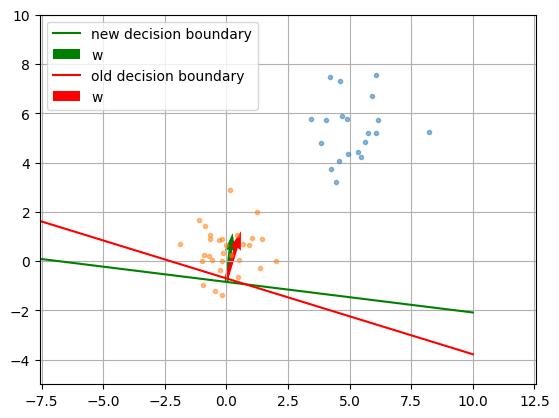

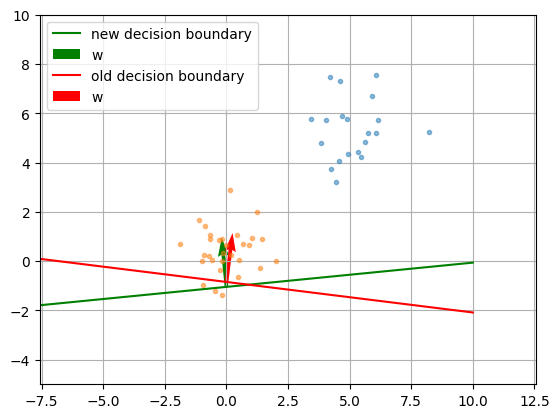

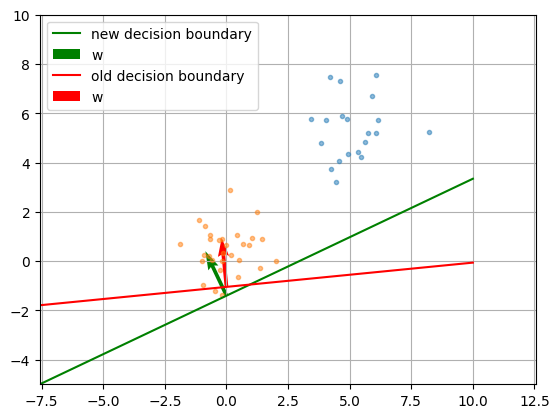

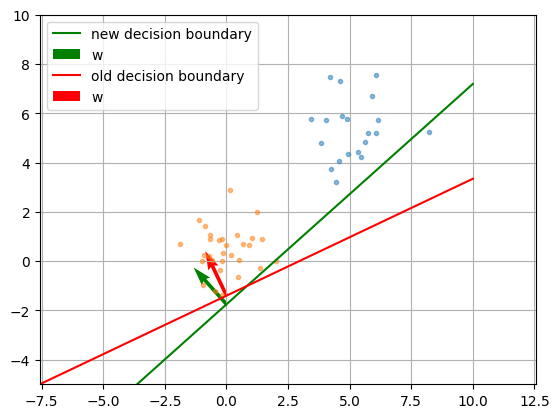

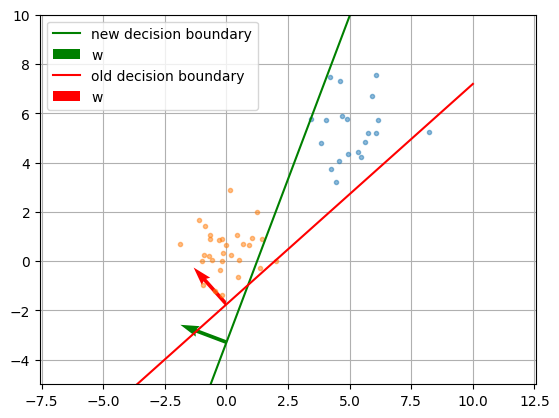

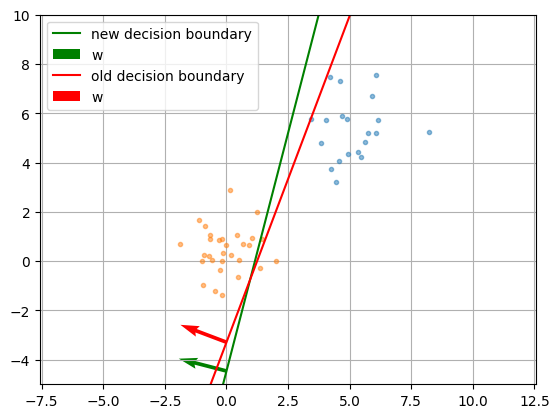

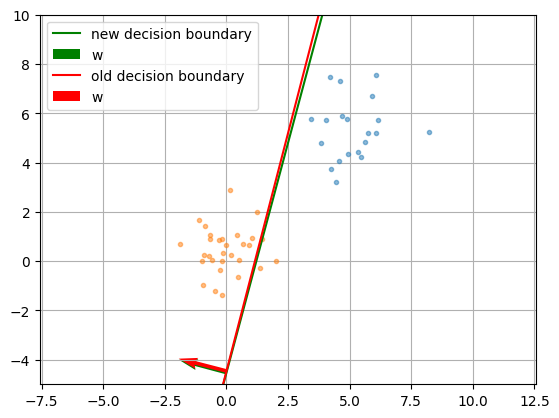

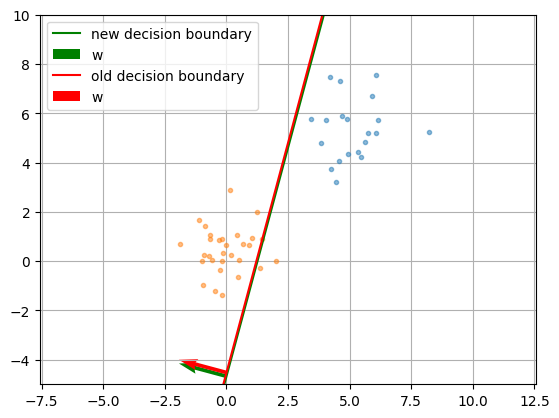

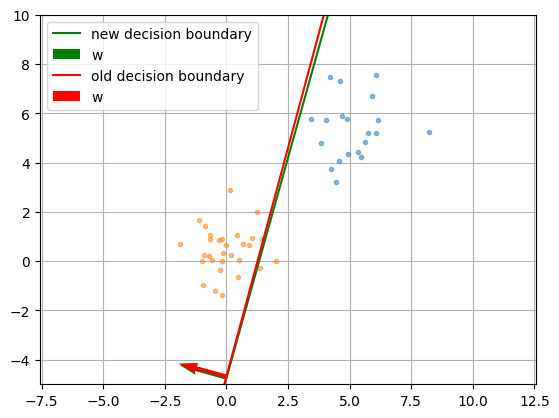

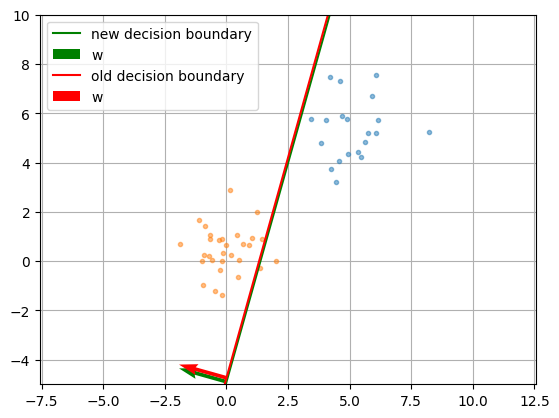

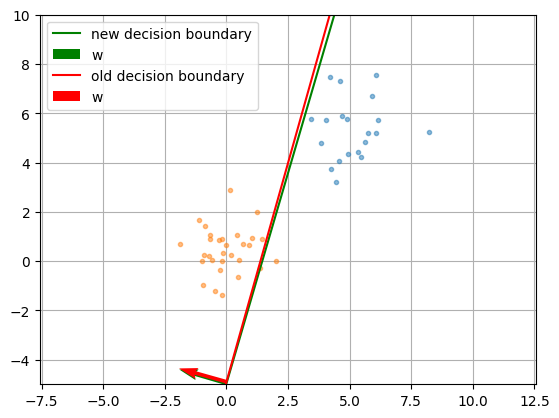

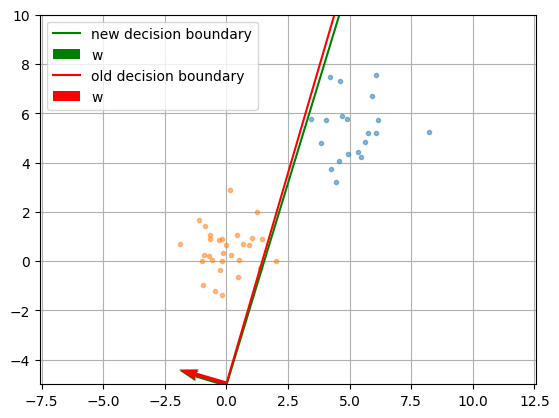

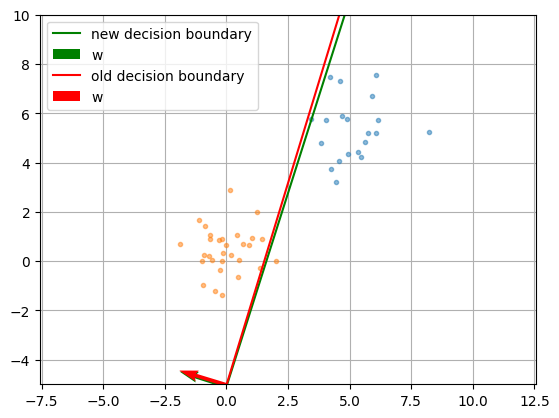

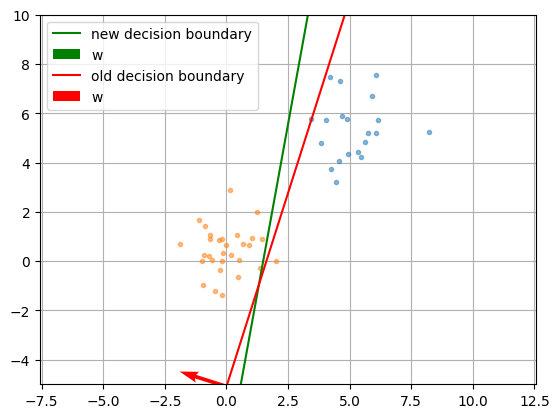

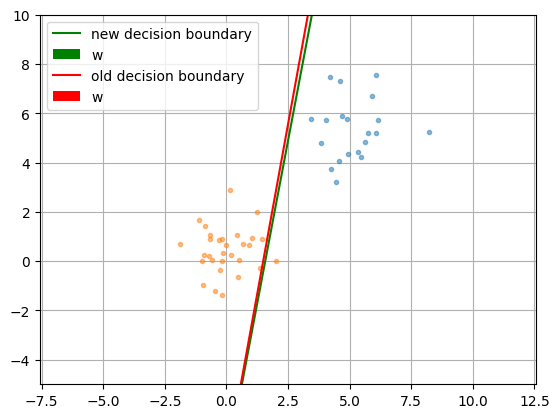

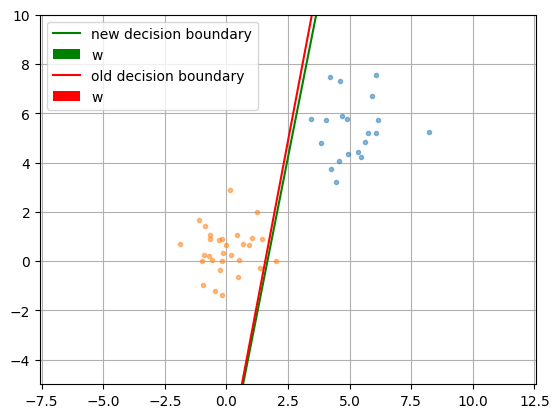

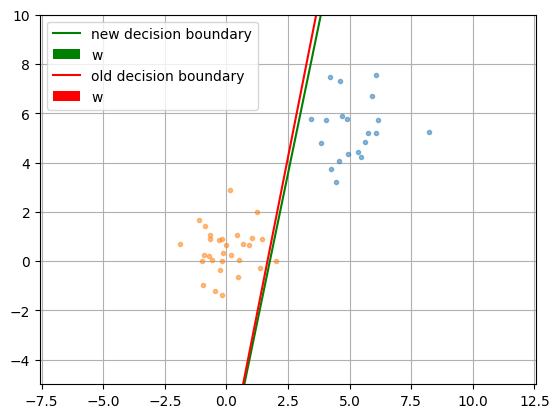

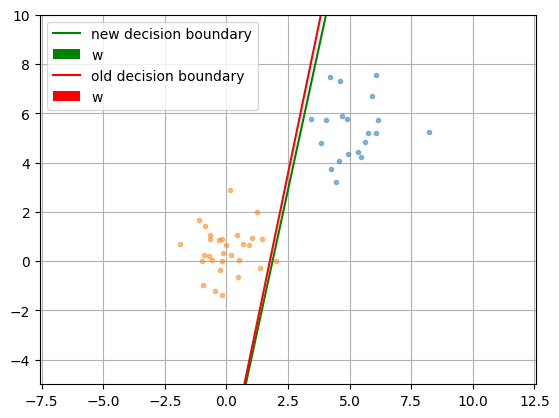

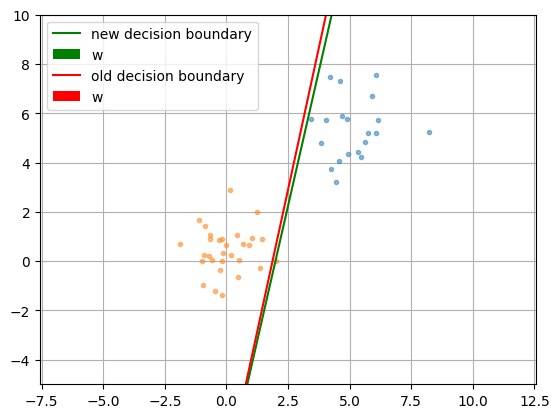

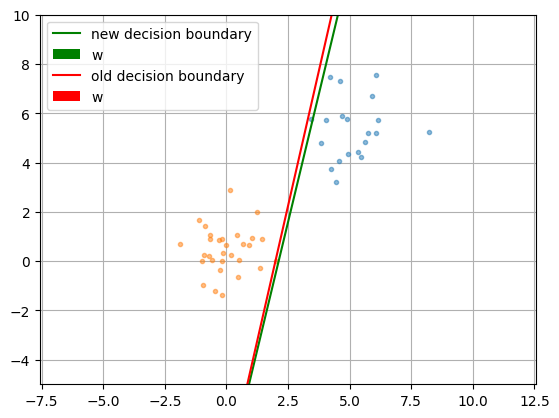

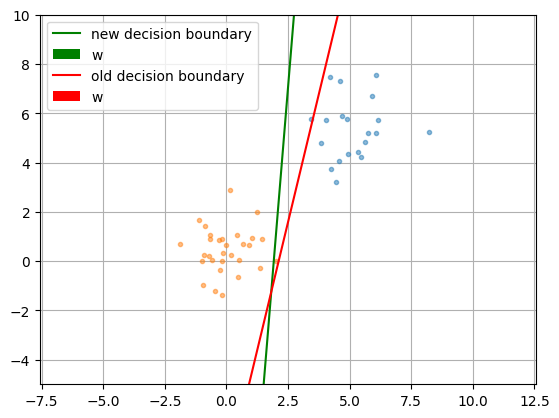

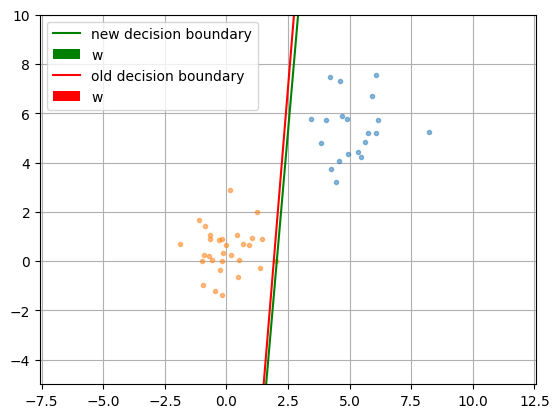

In [33]:
x1_values = np.linspace(-10, 10, 100)
for i in range(len(model2.w_history)-1):
    plt.figure()
    plt.plot(x[y==-1,0], x[y==-1,1], '.', alpha=0.5)
    plt.plot(x[y==1,0], x[y==1,1], '.', alpha=0.5)
    # Calculate corresponding x2 values using the decision boundary equation

    w = model2.w_history[i+1]
    b = model2.b_history[i+1]
    norm = np.linalg.norm(w)
    x2_values = get_decision_boundary(w=w, b=b, x1=x1_values)
    plt.plot(x1_values, x2_values, label = f"new decision boundary", color= "g")
    x1_w = 0
    x2_w = get_decision_boundary(w=w, b=b, x1=0)
    w= w/norm
    plt.quiver(x1_w, x2_w, w[0], w[1], scale_units='xy',angles='xy', scale=1/2, color='g', label="w")
    plt.axis('equal')
    
    w = model2.w_history[i]
    b = model2.b_history[i]
    norm = np.linalg.norm(w)
    x2_values = get_decision_boundary(w=w, b=b, x1=x1_values)
    plt.plot(x1_values, x2_values, label = f"old decision boundary",color="r")
    x1_w = 0
    x2_w = get_decision_boundary(w=w, b=b, x1=0)
    w= w/norm
    plt.quiver(x1_w, x2_w, w[0], w[1], scale_units='xy',angles='xy', scale=1/2, color='r', label="w")
    plt.axis('equal')

    plt.ylim(-5,10)
    plt.xlim(-5,10)
    plt.legend()
    plt.grid()
    plt.show()

## Limitations
The Perceptron can only solve linearly separable problems and struggles with more complex datasets that require non-linear decision boundaries.


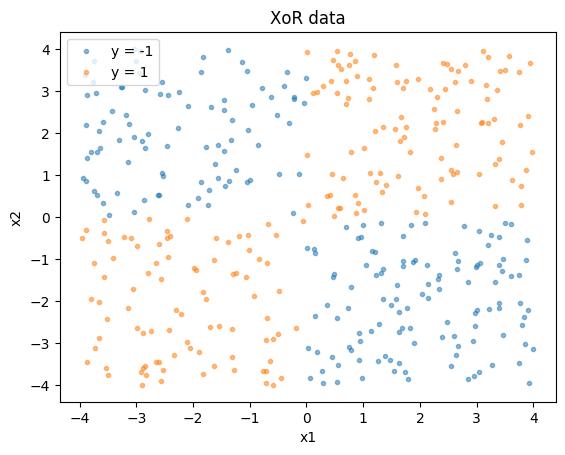

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(low=-4, high=4, size=(400,2))
y = np.bitwise_xor(np.sign(x[:,0]).astype(int),np.sign(x[:,1]).astype(int))
y[y==0] = 1 
y[y==-2] = - 1 
plt.figure()
plt.plot(x[y==-1,0], x[y==-1,1], '.', alpha=0.5, label = "y = -1")
plt.plot(x[y==1,0], x[y==1,1], '.', alpha=0.5, label = "y = 1")
plt.title("XoR data")
plt.ylabel("x2")
plt.xlabel("x1")
plt.legend()
plt.show()

## **Perceptron in Scikit-learn**

Scikit-learn provides an implementation of the Perceptron algorithm, which follows the same API as other models in the library.

You can find details about the model and its hyperparameters [here](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.Perceptron.html).

In [35]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

perceptron_sklearn = Perceptron(eta0=0.01,  # learning rate
                                max_iter=10 # epochs
                               )
perceptron_sklearn.fit(x, y)

Perceptron(eta0=0.01, max_iter=10)

In [36]:
# we can get the weights like this
w = perceptron_sklearn.coef_[0]
b = perceptron_sklearn.intercept_[0]

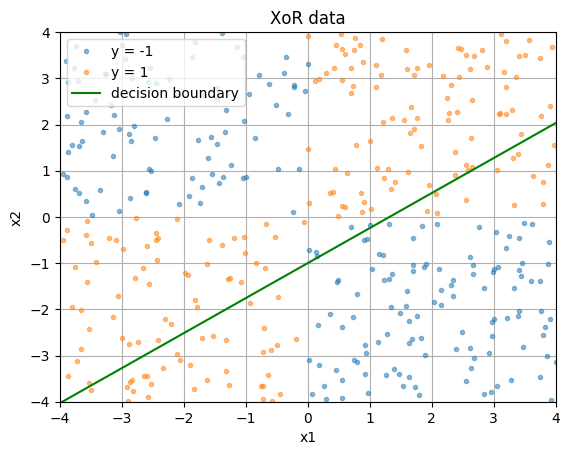

In [37]:
plt.figure()
plt.plot(x[y==-1,0], x[y==-1,1], '.', alpha=0.5, label = "y = -1")
plt.plot(x[y==1,0], x[y==1,1], '.', alpha=0.5, label = "y = 1")

x2_values = get_decision_boundary(w=w, b=b, x1=x1_values)
plt.plot(x1_values, x2_values, label = f"decision boundary", color= "g")

plt.title("XoR data")
plt.ylabel("x2")
plt.xlabel("x1")
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.grid()
plt.legend()
plt.show()

In [38]:
# accuracy
accuracy = perceptron_sklearn.score(x,y)
accuracy

0.6475

# Comparing with KNN

KNN is a non-linear classifier, so it can effectively solve the problem.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10) # just for demostration that knn works
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=10)

In [40]:
from sklearn.metrics import accuracy_score

# accuracy
y_pred = knn.predict(x)
knn_acc = accuracy_score(y_true=y,
                         y_pred= y_pred)

In [41]:
knn_acc

0.98

In [42]:
knn.score(x,y)

0.98

#### Applications
Despite its limitations, the Perceptron is foundational in understanding more complex models.
In later lab we will see some tricks to solve non linear separable data